<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Prabhhav_Project_4_IPL_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task
Hierarchical Clustering Compare players
K-Means, Split players into groups

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/ipl_dataset.csv")

In [ ]:
df.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,X4s,X6s,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,0,0,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,0,0,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,0,3,5,0,0,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,0,0,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,0,0,0.0,0,0,0,0,0.0,0,0,0,0


In [ ]:
df.shape

(143, 25)

EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    object 
 22  X4

In [ ]:
df.describe()

,Mat.x,Inns.x,NO,Runs.x,HS,BF,SR.x,X100,X50,X4s,X6s,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Econ,X4w,X5w,y
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.0
mean,7.286713,6.013986,1.251748,132.349650,33.153846,95.027972,93.120280,0.034965,0.706294,11.461538,6.069930,5.608392,5.006993,16.047552,137.230769,4.629371,0.0,6.158322,0.055944,0.006993,0.0
std,6.077692,5.499022,1.629259,175.482243,31.969684,120.286919,67.202818,0.219236,1.447836,16.706147,8.793924,5.641939,5.387121,18.820205,153.662732,5.909742,0.0,4.679642,0.308933,0.083624,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,7.000000,5.000000,1.000000,52.000000,27.000000,41.000000,117.020000,0.000000,0.000000,3.000000,2.000000,4.000000,3.000000,7.000000,82.000000,2.000000,0.0,7.860000,0.000000,0.000000,0.0
75%,13.000000,11.000000,2.000000,202.000000,53.500000,152.500000,140.595000,0.000000,1.000000,17.000000,8.000000,10.000000,8.500000,28.000000,243.500000,7.500000,0.0,9.500000,0.000000,0.000000,0.0
max,17.000000,17.000000,9.000000,735.000000,128.000000,516.000000,300.000000,2.000000,8.000000,68.000000,37.000000,17.000000,17.000000,68.000000,547.000000,24.000000,0.0,16.950000,3.000000,1.000000,0.0


In [ ]:
np.array(df.columns)

array(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov',
       'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w',
       'y'], dtype=object)

In [ ]:
df.corr()

,Mat.x,Inns.x,NO,Runs.x,HS,BF,SR.x,X100,X50,X4s,X6s,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Econ,X4w,X5w,y
Mat.x,1.000000,0.916473,0.621347,0.723136,0.744583,0.739628,0.777217,0.182690,0.523431,0.673888,0.661068,0.116253,0.053495,0.023220,0.004212,-0.003295,NaN,-0.444839,0.032654,-0.100965,NaN
Inns.x,0.916473,1.000000,0.562398,0.872369,0.854022,0.888250,0.713870,0.239087,0.657717,0.823222,0.795834,-0.090843,-0.165696,-0.196373,-0.219665,-0.193785,NaN,-0.567797,-0.058499,-0.092099,NaN
NO,0.621347,0.562398,1.000000,0.396723,0.409319,0.397643,0.495803,0.014614,0.279354,0.305141,0.369858,0.160959,0.078428,0.040074,0.050595,0.025118,NaN,-0.148006,0.013796,-0.064700,NaN
Runs.x,0.723136,0.872369,0.396723,1.000000,0.884152,0.990385,0.555502,0.384814,0.893337,0.972272,0.921176,-0.277629,-0.317310,-0.322647,-0.342976,-0.304923,NaN,-0.606136,-0.115846,-0.063514,NaN
HS,0.744583,0.854022,0.409319,0.884152,1.000000,0.874033,0.739197,0.402134,0.762310,0.830474,0.866607,-0.280735,-0.327453,-0.344854,-0.361960,-0.337882,NaN,-0.659862,-0.137067,-0.087332,NaN
BF,0.739628,0.888250,0.397643,0.990385,0.874033,1.000000,0.546344,0.344715,0.873881,0.966648,0.876896,-0.295080,-0.343517,-0.348025,-0.369168,-0.328013,NaN,-0.627006,-0.109389,-0.066529,NaN
SR.x,0.777217,0.713870,0.495803,0.555502,0.739197,0.546344,1.000000,0.149589,0.383659,0.503606,0.561732,-0.061619,-0.111514,-0.144184,-0.152878,-0.164780,NaN,-0.472677,-0.099631,-0.116691,NaN
X100,0.182690,0.239087,0.014614,0.384814,0.402134,0.344715,0.149589,1.000000,0.254441,0.349349,0.502798,0.011148,-0.018097,-0.041368,-0.038496,-0.060587,NaN,-0.088353,-0.029084,-0.013431,NaN
X50,0.523431,0.657717,0.279354,0.893337,0.762310,0.873881,0.383659,0.254441,1.000000,0.881713,0.805290,-0.367646,-0.355474,-0.332206,-0.346807,-0.303347,NaN,-0.555473,-0.088962,-0.041081,NaN
X4s,0.673888,0.823222,0.305141,0.972272,0.830474,0.966648,0.503606,0.349349,0.881713,1.000000,0.843339,-0.301860,-0.325787,-0.318031,-0.340483,-0.298979,NaN,-0.608277,-0.107375,-0.057776,NaN


In [ ]:
for i in np.array(df.columns):
  print(i,df[i].nunique())

PLAYER 143
Mat.x 18
Inns.x 18
NO 9
Runs.x 90
HS 62
Avg.x 95
BF 85
SR.x 98
X100 3
X50 8
X4s 40
X6s 30
Mat.y 18
Inns.y 18
Ov 68
Runs.y 88
Wkts 22
BBI 1
Avg.y 81
Econ 83
SR.y 69
X4w 3
X5w 2
y 1


In [ ]:
for i in np.array(df.columns):
  print(i, df[i].unique(), "\n**********\n" )

PLAYER ['Aaron Finch' 'AB de Villiers' 'Abhishek Sharma' 'Ajinkya Rahane'
 'Alex Hales' 'Ambati Rayudu' 'Andre Russell' 'Andrew Tye' 'Axar Patel'
 'Ben Cutting' 'Ben Stokes' 'Bhuvneshwar Kumar' 'Brendon McCullum'
 'Carlos Brathwaite' 'Chris Gayle' 'Chris Lynn' 'Chris Morris'
 'Chris Woakes' 'Colin de Grandhomme' 'Colin Munro' 'Corey Anderson'
 "D'Arcy Short" 'Dan Christian' 'David Miller' 'Deepak Chahar'
 'Deepak Hooda' 'Dinesh Karthik' 'Dwayne Bravo' 'Evin Lewis'
 'Faf du Plessis' 'Gautam Gambhir' 'Glenn Maxwell' 'Harbhajan Singh'
 'Hardik Pandya' 'Harshal Patel' 'Heinrich Klaasen' 'Ishan Kishan'
 'Jason Roy' 'Jaydev U0dkat' 'Jofra Archer' 'Jos Buttler' 'JP Duminy'
 'Kane Williamson ' 'Karun 0ir' 'Kedar Jadhav' 'Kieron Pollard'
 'Krish0ppa Gowtham' 'Kru0l Pandya' 'Lokesh Rahul' 'Mahipal Lomror'
 'Ma0n Vohra' 'Mandeep Singh' 'Manish Pandey' 'Manoj Tiwary'
 'Marcus Stoinis' 'Mayank Agarwal' 'Mayank Markande' 'Mitchell Johnson'
 'Moeen Ali' 'Mohammad 0bi' 'Mohammed Siraj' 'MS Dhoni' 'Nit

In [ ]:
df.columns

Index(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w', 'y'],
      dtype='object')

In [ ]:
df['SR.y']=df['SR.y'].replace('-',0).astype('float64')
df['Avg.y']=df['Avg.y'].replace('-',0).astype('float64')
df['Avg.x']=df['Avg.x'].replace('-',0).astype('float64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    float64
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    float64
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    float64
 22  X4

In [ ]:
df.BBI.unique()

array([0])

In [ ]:
df.y.unique()

array([0])

In [ ]:
df.drop("BBI",axis = 1, inplace = True)
df.drop("y", axis=1, inplace = True)

In [ ]:
df.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,X4s,X6s,Mat.y,Inns.y,Ov,Runs.y,Wkts,Avg.y,Econ,SR.y,X4w,X5w
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,0,0,0.0,0,0,0.0,0.0,0.0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,0,0,0.0,0,0,0.0,0.0,0.0,0,0
2,Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5,0,0,0.0,0,0,0.0,0.0,0.0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,0,0,0.0,0,0,0.0,0.0,0.0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,0,0,0.0,0,0,0.0,0.0,0.0,0,0


Hierarchial Clustering Compare players

In [ ]:
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [ ]:
df.columns

Index(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w'],
      dtype='object')

In [ ]:
featureset = df[['Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w']]


Normalizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.58823529, 0.52941176, 0.11111111, 0.18231293, 0.359375  ,
        0.22088883, 0.19379845, 0.44666667, 0.        , 0.        ,
        0.08823529, 0.21621622, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.70588235, 0.64705882, 0.22222222, 0.65306122, 0.703125  ,
        0.70328366, 0.53294574, 0.5818    , 0.        , 0.75      ,
        0.57352941, 0.81081081, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.17647059, 0.17647059, 0.22222222, 0.08571429, 0.359375  ,
        0.83080575, 0.06395349, 0.63633333, 0.        , 0.        ,
        0.04411765, 0.13513514, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.88235294, 0.82352941, 0.11111111, 0.50340136, 0.5078125 ,
        0.3753132

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion = 'distance')
clusters

array([16,  5, 18, 10, 17,  2, 13, 15, 25, 25, 23, 28, 17, 39,  6,  5, 39,
       37, 25, 17, 36, 19, 37, 17, 28, 19,  5, 14, 10, 16, 17, 26, 28, 24,
       39, 17, 10, 16, 22, 28,  5, 21,  1, 10, 20, 16, 23, 23,  2, 21, 17,
        9, 10, 21, 38, 16, 22, 32, 39, 36, 28,  3,  7, 16, 22,  9, 16, 38,
        9, 14, 23, 23, 20,  1, 10, 10, 16,  6, 17, 14,  4, 22,  5, 27, 17,
       28,  6,  9, 21, 13,  6,  5, 27, 37,  8,  5, 38, 16,  7, 21, 34, 30,
       33, 34, 35, 29, 29, 35, 29, 35, 34, 35, 29, 29, 29, 11, 35, 34, 35,
       34, 35, 11, 35, 29, 30, 34, 31, 35, 30, 31, 35, 29, 35, 34, 30, 35,
       31, 29, 12, 11, 11, 35, 31], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 3
clusters = fcluster(Z,  k, criterion='maxclust')
clusters

array([3, 1, 3, 1, 3, 1, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3, 1, 1,
       3, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3], dtype=int32)

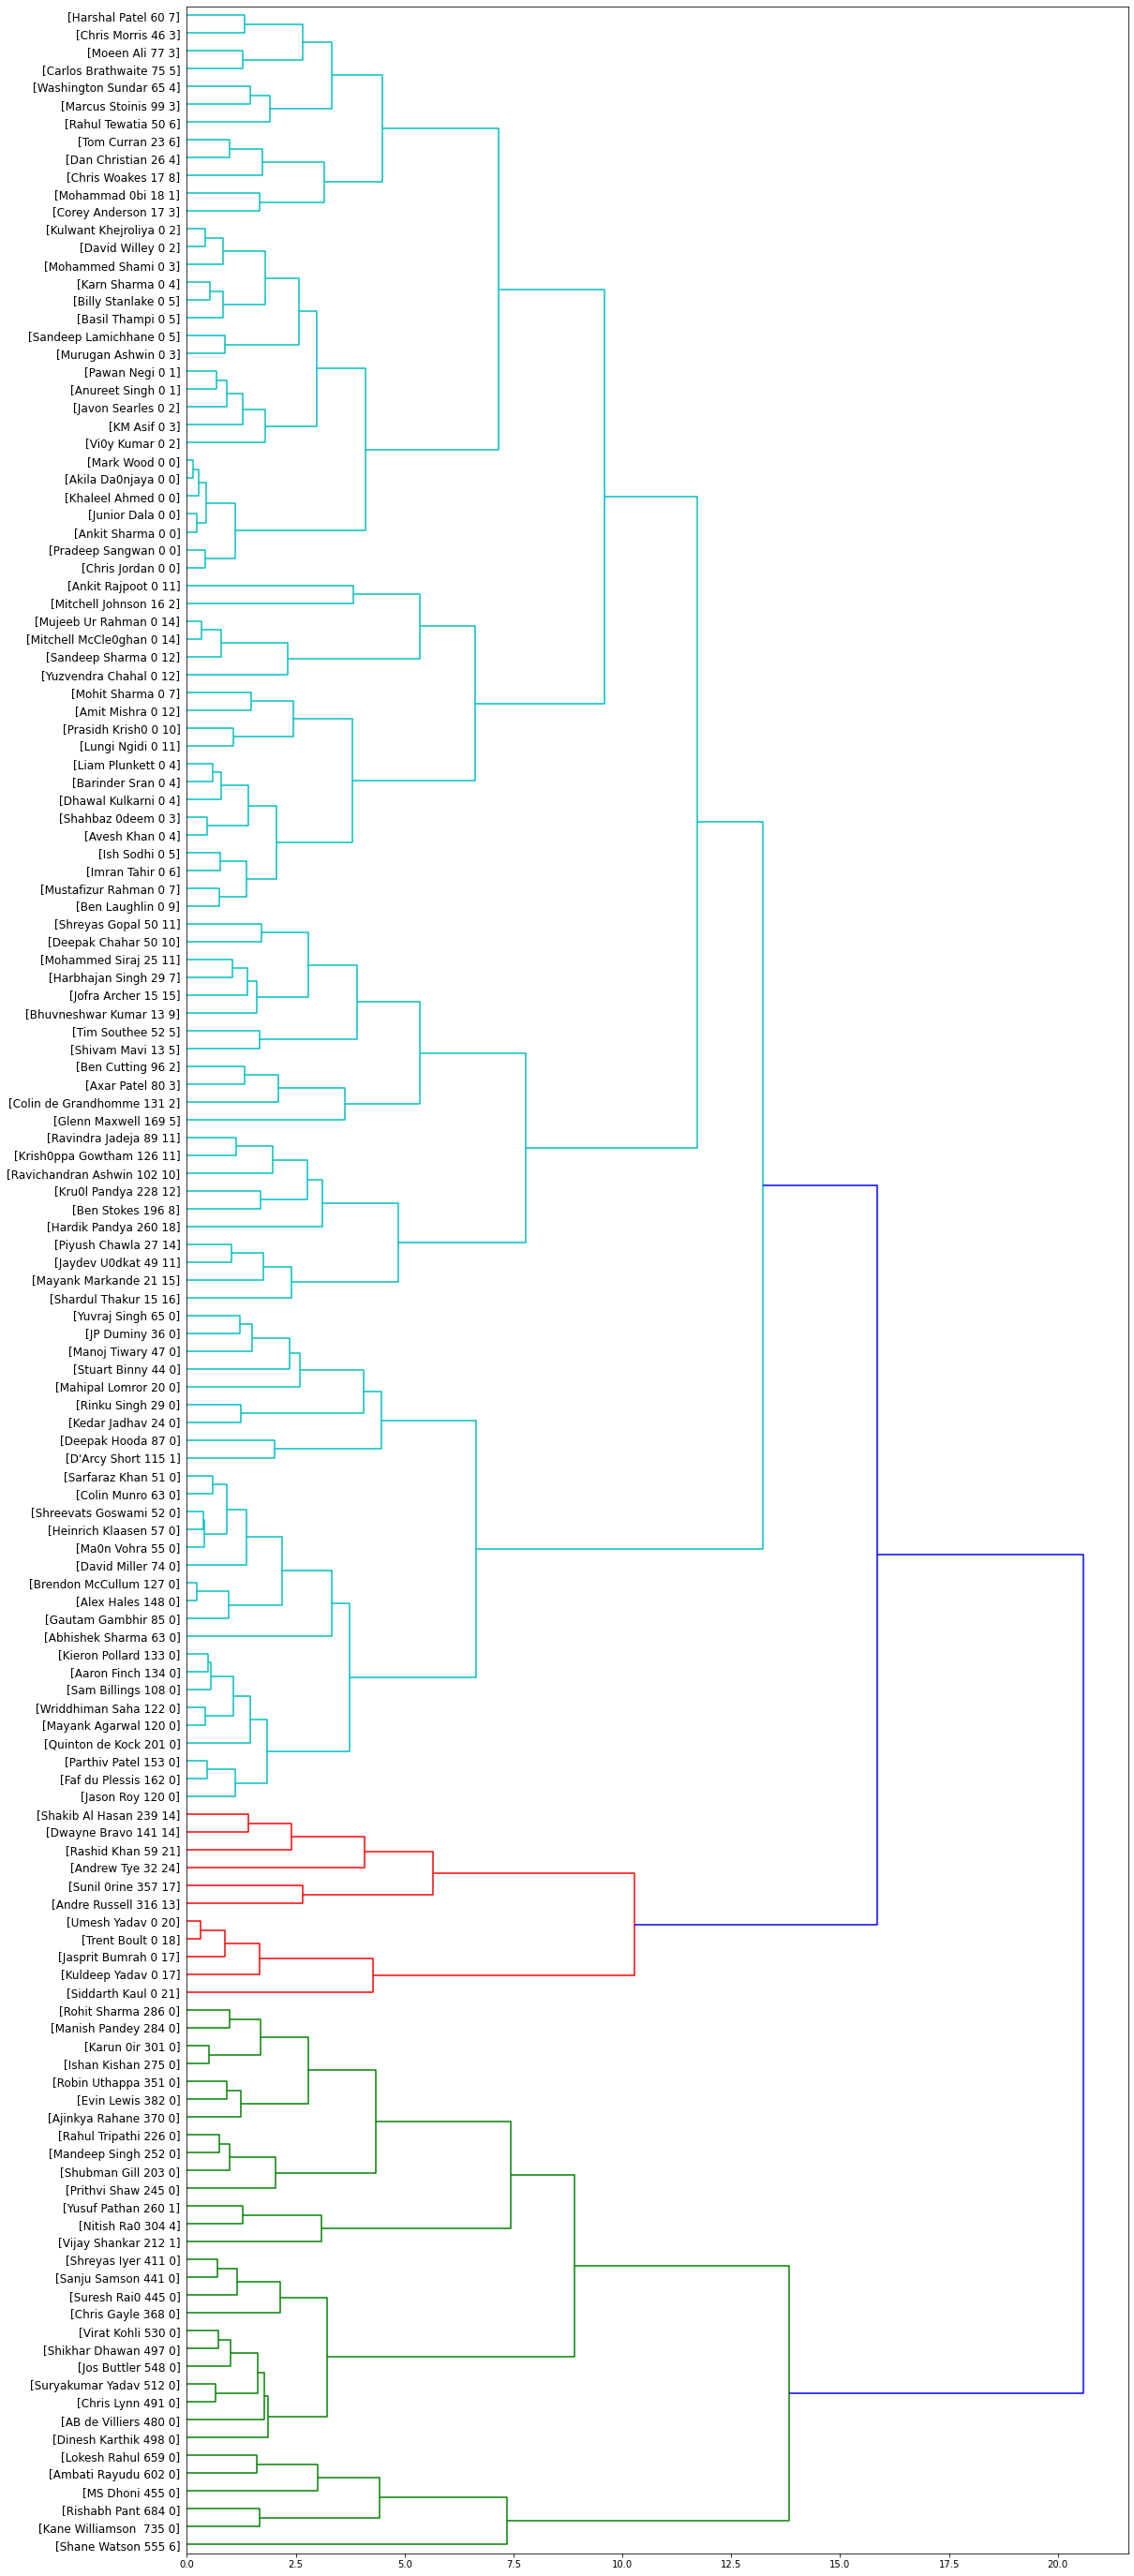

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (df['PLAYER'][id],df['Runs.x'][id], df['Wkts'][id] )
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')  


In [ ]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist)